# Desafío - Naive Bayes

Descripción
- En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de
distintos artistas. Cada uno de los ​csv se encuentra en la carpeta ​dump dentro del
proyecto.
- Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del
artista, el género musical del artista, el nombre de la canción y las letras.
- En base a esta información, se les pide un modelo generativo que pueda predecir el
género de una canción a partir de la letra de una canción.
- Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad
trabajaremos con un Multinomial Naive Bayes.

## Ejercicio 1: Preparar el ambiente de trabajo

  - Importe los módulos ​numpy​, ​pandas​,​ matplotlib​,​ seaborn​, ​glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.
  - Para ello genere un objeto que guarde en una lista todos los archivos alojados en ​dump utilizando ​glob.glob y​ os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto ​pd.DataFrame​ que contenga todos los ​csv​.
  - Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#incorporación de tiempo de ejecución de celdas
!pip install ipython-autotime
%load_ext autotime

#Los siguientes 2 módulos sirve para importar múltiples archivos dentro de una carpeta.
import glob, os

time: 891 µs (started: 2021-10-10 17:25:56 +00:00)


In [2]:
path_colab = "/content/drive/MyDrive/Data Scientist/Desafío Latam/3 .-Machine Learning/2 .-Algoritmos de clasificación (I)/Desafíos/dump/*"
path_casa = "dump/*"

df = pd.DataFrame()

for name in glob.glob(path_colab):
    df = df.append(pd.read_csv(name))

df = df.drop(columns = 'Unnamed: 0').rename(columns = {"0":"Artista", "1":"Género","2":"Canción","3":"Letra"})
df.head()

,Artista,Género,Canción,Letra
0,Tool,metal,Sweat,I'm sweating and breathing \n And staring and ...
1,Tool,metal,Hush,Fuck you \n I can't say what I want to \n Even...
2,Tool,metal,Part Of Me,I know you well \n You are a part of me \n I k...
3,Tool,metal,Cold And Ugly,"""Throw that Bob Marley wanna-be motherfucker o..."
4,Tool,metal,Jerk-Off,Someone told me once that \n There's a right a...


time: 657 ms (started: 2021-10-10 17:25:56 +00:00)


In [3]:
df.shape

(9489, 4)

time: 5.25 ms (started: 2021-10-10 17:25:57 +00:00)


In [4]:
df.isnull().sum()

Artista    0
Género     0
Canción    0
Letra      0
dtype: int64

time: 14.4 ms (started: 2021-10-10 17:25:57 +00:00)


# Ejercicio 2: Descripción de los datos

## Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:

    ○ La cantidad de canciones registradas por cada artista, ordenados de mayor a menor.    
    ○ La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

Además, comente sobre las principales tendencias

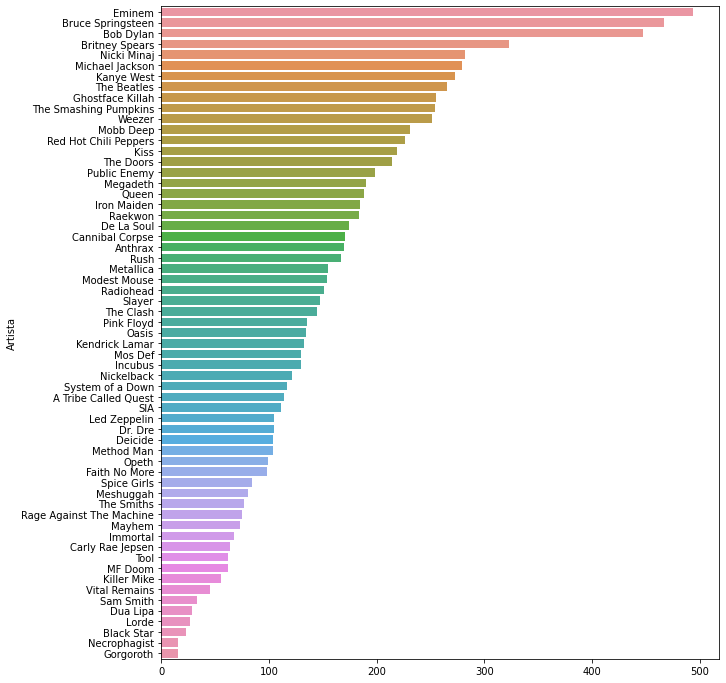

time: 1.19 s (started: 2021-10-10 17:25:57 +00:00)


In [5]:
plt.rcParams["figure.figsize"] = (10,12)
artistas = df.groupby('Artista')['Artista'].count().sort_values(ascending = False)
sns.barplot(x = artistas.values, y = artistas.index, orient = 'h')

**Comentario**

Los primeros cuatro artistas tienen más canciones en bastante mayor proporción que los siguientes, estos son:

1.   Eminem
2.   Bruce Springsteen
3.   Bob Dylan
4.   Britney Spears

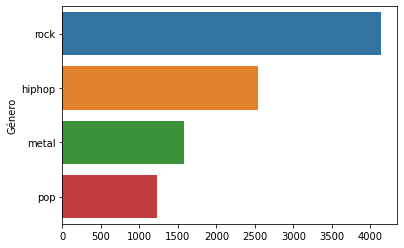

time: 172 ms (started: 2021-10-10 17:25:58 +00:00)


In [6]:
plt.rcParams["figure.figsize"] = (6,4)
genero = df.groupby('Género')['Género'].count().sort_values(ascending = False)
sns.barplot(x = genero.values, y = genero.index, orient = 'h')

**Comentario**

Interesante notar que la mayor cantidad de canciones son del género Rock. Diría que este dataset fue intencionalmente elegido para tener sólo estos con estos cuatro géneros. Debe haberse creado antes del año 2.000.

# Ejercicio 3: Matriz de ocurrencias

Digresión: Tokenización de Textos

- Para poder trabajar con textos, debemos pasarlos a una ​matriz dispersa​, donde cada fila representará una entrada (en este caso, una canción), y cada columna ​representará una palabra (token)​. Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus).
- El tokenizador más simple​ sklearn.feature_extraction.text.CountVectorizer genera una colección de textos a una matriz que representa la frecuencia ​dentro del texto de una palabra específica.
- El tokenizador funciona de la siguiente manera:



```
from​ sklearn.feature_extraction.text ​import​ CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words=​'english'​)
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=​0​)
```



## a) Importe la clase ​CountVectorizer dentro de los módulos ​feature_extraction.text de la librería​sklearn​. Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?

**Comentario**

El objetivo de <code>sklearn.feature_extraction.text</code> es convertir una colección de documentos (o columna de textos) en una matriz de conteo de tokens (de palabras dentro de una o varias cadenas de texto), se puede dar un diccionario de palabras para que cuenta solo estas, por defecto entregará el conteo de cada una de las palabras que encuentre, también se puede dar un número para que eliga las X cantidad de palabras más repetidas dentro del corpus(cadena de texto o conjunto de cadenas de texto), como el caso a continuación:

## b) Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.

In [7]:
#importamos librería asociada
from sklearn.feature_extraction.text import CountVectorizer

#Generamos nuestro instanciador/objeto
count_vectorizer = CountVectorizer(lowercase = True, max_features = 100, stop_words = 'english')

#fiteamos
count_vectorizer_fit = count_vectorizer.fit_transform(df['Letra'])

#Extraemos las palabras
words = count_vectorizer.get_feature_names()
print(words)
print(count_vectorizer_fit.shape)

['ah', 'ain', 'ass', 'away', 'baby', 'bad', 'better', 'big', 'bitch', 'black', 'boy', 'cause', 'come', 'day', 'dead', 'death', 'did', 'die', 'don', 'em', 'end', 'everybody', 'eyes', 'face', 'feel', 'fuck', 'girl', 'god', 'gone', 'gonna', 'good', 'got', 'gotta', 'hard', 'head', 'hear', 'heart', 'hey', 'high', 'hit', 'hold', 'home', 'inside', 'just', 'know', 'la', 'leave', 'left', 'let', 'life', 'light', 'like', 'little', 'live', 'll', 'long', 'look', 'love', 'make', 'man', 'mind', 'money', 'need', 'new', 'nigga', 'niggas', 'night', 'oh', 'ooh', 'people', 'real', 'really', 'right', 'rock', 'run', 'said', 'say', 'shit', 'soul', 'stay', 'stop', 'tell', 'thing', 'things', 'think', 'till', 'time', 'tonight', 'try', 'turn', 'uh', 've', 'wanna', 'want', 'way', 'won', 'world', 'ya', 'yeah', 'yo']
(9489, 100)
time: 2.27 s (started: 2021-10-10 17:25:59 +00:00)


**Comentario**

En efecto, generó una matriz donde cada fila de count_vectorizer_fit representa cada fila del dataset-input (9489), y cada columna de count_vectorizer_fit es cada una de las palabras que generó CountVectorizer (100 palabras más repetidas, como lo fijamso dentro de los argumentos de la clase).

## c) Genere una función que replique el procedimiento para cada uno de los géneros.

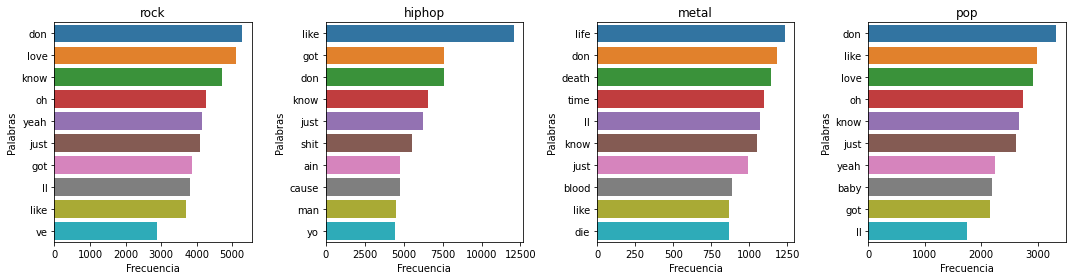

time: 3.19 s (started: 2021-10-10 17:26:01 +00:00)


In [8]:
def palabras_por_genero(genero):
  #Generamos nuestro instanciador/objeto, con las palabras en lowercase y sólo las 100 más repetidas dentro del género elegido, en inglés
  count_vectorizer = CountVectorizer(lowercase = True, max_features = 100, stop_words = 'english')

  #fiteamos en torno al "genero" elegido
  count_vectorizer_fit = count_vectorizer.fit_transform(df[df['Género'] == genero]['Letra'])

  #Extramos las palabras
  words = count_vectorizer.get_feature_names()

  #Conteo de cada palabra a lo largo de la matriz generada
  words_freq = count_vectorizer_fit.toarray().sum(axis = 0)
  
  #Creamos un nuevo dataframe llamado "data", para tener las 2 columnas de interés, la palabra y la frecuencia de la misma
  data = pd.DataFrame()
  data['Palabras'] = words
  data['Frecuencia'] = words_freq
  return data

#generaremos subplots para graficar cada una de las 10 palabras más repetidas por cada género
fig, axs = plt.subplots(1,4, figsize = (15,4))

#for respectivo para ir por los cuatro géneros que tiene el dataset, para poder hacer un análisis rápido de las palabras esta vez se
#eligieron sólo las 10 palabras más repetidas por cada genero.
for x,y in enumerate(['rock', 'hiphop', 'metal', 'pop']):
  deefe = palabras_por_genero(y).sort_values(by = 'Frecuencia', ascending = False)[0:10]
  sns.barplot(data = deefe, x = 'Frecuencia', y = 'Palabras', orient = 'h', ax= axs[x]).set_title(y)
plt.tight_layout()

## d) Comente sobre las principales características de cada género en cuanto a sus palabras.

**Comentarios**

1. Era esperable notar que la palabra número 10 más dicha en el género hiphop se dice una cantidad de veces similar a la más dicha en rock.
2. También notar que la décima palabra más dicha en hiphop se dice más veces que en la palabra más dicha tanto en metal como en pop. Naturalmente esto es porque el género tiende a contener más letras cuando los artistas cantan este género.
3. Las palabras "don", "know", "just" y "like" forman parte del top 10 de las palabras más usadas en los cuatro géneros.
4. "death" y "blood" sólo aparecen en el género metal (como top 10).
5. "love" sólo aparece en rock y pop.
6. "baby" sólo aparece en pop.
7. En el género metal no se repiten mucho las palabras, por lo que podría indicar que varían bastante o bien simplemente se usa una cantidad menor de letras para una misma canción en promedio.

# Ejercicio 4: Entrenamiento del Modelo

Digresión: ​sklearn​ Pipelines

- La clase ​Pipeline del módulo​ sklearn.pipeline permite concatenar múltiples pasos de procesamiento  preprocesamiento en un estimador generado por algún método de scikit-learn​. En sí, la clase cuenta con los métodos clásicos ​fit​, ​predict y​ score, y presenta un comportamiento idéntico a los demás objetos de ​scikit-learn​. Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.

Componentes de un ​Pipeline

- Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo ​Estandarizar​, posteriormente​ extraer sus principales componentes y finalmente aplicar un modelo de ​regresión lineal​. Este flujo se puede reexpresar como:

       pipeline_model = Pipeline(
         [(​'scale'​, StandardScaler()),
         (​'pca'​, RandomizedPCA(n_components=​3​)),
         (​'model'​, LinearRegression())]
       )

Algunos de los elementos a considerar:

- Cada paso se considera como una tupla, donde se declara el nombre del paso y la función a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que asociamos el método ​StandardScaler​ con el string ​scale​.
- Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso representa el orden de ejecución.

Posteriormente el objeto creado puede utilizarse con los siguientes métodos:

    pipeline_model.fit(X_train, y_train)
    y_hat = pipeline_model.predict(X_test)

## a) Importe​ MultinomialNB​, ​train_test_split​, ​Pipeline​, ​confusion_matrix y classification_report​.

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

time: 19.4 ms (started: 2021-10-10 17:26:04 +00:00)


## b) Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.


**Se nos pide generar un modelo generativo que permita inferir el género de una canción en base a su letra**

In [10]:
X = df['Letra']
y = df['Género']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

time: 7.47 ms (started: 2021-10-10 17:26:04 +00:00)


## c) Monte el modelo dentro de un​ Pipeline​, donde el primer paso es implementar CountVectorizer​ y el segundo es ejecutar el clasificador ​MultinomialNB​

In [11]:
modelo = Pipeline([
                   ('CountV', CountVectorizer(lowercase = True, stop_words = 'english')),
                   ('MultiN', MultinomialNB()),
])

time: 2.3 ms (started: 2021-10-10 17:26:04 +00:00)


## d) A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?

    [​'I got a place in the underworld'​, ​# Brody Dalle - Underworld
    'As veils of ignorance, hatred retains Storm of arrows through karmaSeeking light through samsara'​, ​# Gorguts - Forgotten Arrows
    "Bye bye Don't want to be a fool for you Just another player in your gamefor two You may hate me but it ain't no lie"​, ​# N'SYNC - Bye Bye Bye'
    'Move bitch, get out the way Get out the way bitch, get out the way Movebitch, get out the way Get out the way bitch, get out the way'​, ​# Ludacris- Move B*tch
    'Sexual violence doesn'​t start ​and​ end ​with​ rape It starts ​in​ our books ​andbehind our school gates​' # IDLES - Mother,
    "Take it from the girl you claimed to love You gonna get some bad karma I'​m the one who had to learn to build a heart made of armor From the girl who made you soup ​and​ tied yourshoes when you were hurting You are ​not​ deserving, you are ​not​ deserving​" #Banks - Drowning]

In [12]:
#Primero fitearemos nuestro modelo
modelo = modelo.fit(X_train, y_train)

validación = ["I got a place in the underworld", # Brody Dalle - Underworld
"As veils of ignorance, hatred retains Storm of arrows through karmaSeeking light through samsara", # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your gamefor two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye'
"Move bitch, get out the way Get out the way bitch, get out the way Movebitch, get out the way Get out the way bitch, get out the way", # Ludacris- Move B*tch
"Sexual violence doesn'​t start ​and​ end ​with​ rape It starts ​in​ our books ​andbehind our school gates", # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'​m the one who had to learn to build a heart made of armor From the girl who made you soup ​and​ tied yourshoes when you were hurting You are ​not​ deserving, you are ​not​ deserving" #Banks - Drowning
]

#Predecimos el listado de canciones entregado, por tanto el siguiente objeto list sería el listado de predicciones:
modelo.predict(validación)

array(['rock', 'metal', 'rock', 'pop', 'metal', 'rock'], dtype='<U6')

time: 1.39 s (started: 2021-10-10 17:26:04 +00:00)


## e) Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [13]:
#Predecimos
y_predict = modelo.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

      hiphop       0.85      0.94      0.89       998
       metal       0.81      0.73      0.76       615
         pop       0.71      0.39      0.51       492
        rock       0.78      0.87      0.82      1691

    accuracy                           0.80      3796
   macro avg       0.79      0.73      0.75      3796
weighted avg       0.80      0.80      0.79      3796

[[ 935    7   13   43]
 [  21  446    7  141]
 [  70    9  194  219]
 [  74   92   59 1466]]
time: 960 ms (started: 2021-10-10 17:26:05 +00:00)


**Comentarios**

Para el conjunto de testeo el modelo predice f1-scores sobre el 0.8 para los géneros "hiphop" y "rock", sin embargo, para el género "metal" se reduce a 0.75, y aún más bajo para el género pop cuyo f1-score llega a 0.54.

Ahora, lo que tambié es cierto, es que nuestra dataframe completo tiene más datos de las clases que mejor está prediciendo.

Recordar que este nivel de "balanceo" se tiene:

In [21]:
df['Género'].value_counts(normalize = True)

rock      0.436295
hiphop    0.267151
metal     0.166719
pop       0.129835
Name: Género, dtype: float64

time: 16.7 ms (started: 2021-10-10 17:26:43 +00:00)


# Ejercicio 5: Mejora del Modelo

## a) Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.

**Propuesta de estrategia**

Undersampling, seleccionaremos aleatoriamente una cantidad de cada género, igual a la cantidad de la clase minoritario (en este caso, el género pop es el que tiene menor cantidad registros).

Probé arreglando los priors, pero no mejoró (dejo el código al final)

## b1) Repita los pasos de entrenamiento y reporte de métricas,esta vez incluyendo los nuevos datos suministrados.

In [25]:
path_colab2 = "/content/drive/MyDrive/Data Scientist/Desafío Latam/3 .-Machine Learning/2 .-Algoritmos de clasificación (I)/Desafíos/dump_plus_pop/*"
path_casa2 = "dump_plus_pop/*"

df_plus_pop = pd.DataFrame()

for name in glob.glob(path_colab2):
    df_plus_pop = df_plus_pop.append(pd.read_csv(name))

df_plus_pop.head()
df_plus_pop = df_plus_pop.drop(columns = 'Unnamed: 0').rename(columns = {"0":"Artista", "1":"Género","2":"Canción","3":"Letra"})
df_plus_pop.shape

(10804, 4)

time: 731 ms (started: 2021-10-10 17:34:31 +00:00)


In [27]:
#Veamos el balanceo de clases
df_plus_pop['Género'].value_counts('%')

rock      0.383191
pop       0.235746
hiphop    0.234635
metal     0.146427
Name: Género, dtype: float64

time: 11.4 ms (started: 2021-10-10 17:36:31 +00:00)


In [26]:
X = df_plus_pop['Letra']
y = df_plus_pop['Género']

#respetamos el test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

#generamos nuestro nuevo pipeline
modelo_malazo = Pipeline([
                   ('CountV2', CountVectorizer(lowercase = True, stop_words = 'english')),
                   ('MultiN2', MultinomialNB(class_prior=[0.25,0.25,0.25,0.25])),
])

#generamos nuevos set de train y test
modelo_malazo = modelo_malazo.fit(X_train, y_train)

#Predecimos X_test
y_predict = modelo_malazo.predict(X_test)

#Generamos métricas
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

      hiphop       0.85      0.91      0.88      1047
       metal       0.82      0.71      0.76       610
         pop       0.65      0.65      0.65      1034
        rock       0.74      0.74      0.74      1631

    accuracy                           0.76      4322
   macro avg       0.76      0.75      0.76      4322
weighted avg       0.76      0.76      0.76      4322

[[ 948    4   67   28]
 [  19  434   26  131]
 [  84    6  676  268]
 [  64   87  270 1210]]
time: 2.57 s (started: 2021-10-10 17:36:02 +00:00)


## c1) Comente sobre el desempeño general de este.

**Comentario**

Si bien el accuracy del f1-score empeora desde 0.80 a 0.76, las predicciones de la clase minoritaria (pop) mejoraron desde 0.51 a 0.65, también se puede notar que bajó la predicción de rock desde 0.82 a 0.74.

Es interesante notar que las predicciones y entrenamientos de los modelos dependen totalmente del balanceo de clases.

## b2) Cree un nuevo modelo mejorado donde use su estrategia planteada (al final del notebook comento lo de los priors)

In [15]:
#vamos primero a hacer un undersampling a mano (luego me pueden enseñar como hacerlo de una forma más rápida ¿por favor?)

import random

random.seed(123)

pop = df[df['Género'] == 'pop']
rock = df[df['Género'] == 'rock'].sample(len(pop))
hiphop = df[df['Género'] == 'hiphop'].sample(len(pop))
metal = df[df['Género'] == 'metal'].sample(len(pop))

time: 18.1 ms (started: 2021-10-10 17:26:06 +00:00)


In [16]:
#Corroboramos que cada df esté sólo teniendo del género que le corresponde
print(pop['Género'].value_counts())
print(rock['Género'].value_counts())
print(hiphop['Género'].value_counts())
print(metal['Género'].value_counts())

pop    1232
Name: Género, dtype: int64
rock    1232
Name: Género, dtype: int64
hiphop    1232
Name: Género, dtype: int64
metal    1232
Name: Género, dtype: int64
time: 14.1 ms (started: 2021-10-10 17:26:07 +00:00)


In [17]:
#concatenamos nuestro nuevo dataframe a usar para separar muestras, entrenar el modelo mejorado.
new_df = pd.DataFrame()

new_df = new_df.append(rock).append(metal).append(pop).append(hiphop)

new_df.shape

(4928, 4)

time: 13.7 ms (started: 2021-10-10 17:26:07 +00:00)


In [18]:
#generamos nuestro nuevo pipeline
modelo_wenazo = Pipeline([
                   ('CountV', CountVectorizer(lowercase = True, stop_words = 'english')),
                   ('MultiN', MultinomialNB()),
])

time: 3.54 ms (started: 2021-10-10 17:26:07 +00:00)


In [19]:
X = new_df['Letra']
y = new_df['Género']

#respetamos el test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

#generamos nuevos set de train y test
modelo_wenazo = modelo_wenazo.fit(X_train, y_train)

#Predecimos X_test
y_predict = modelo_wenazo.predict(X_test)

#Generamos métricas
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

      hiphop       0.81      0.92      0.86       501
       metal       0.85      0.80      0.82       491
         pop       0.64      0.72      0.67       476
        rock       0.67      0.53      0.59       504

    accuracy                           0.74      1972
   macro avg       0.74      0.74      0.74      1972
weighted avg       0.74      0.74      0.74      1972

[[459   5  23  14]
 [ 14 394  33  50]
 [ 53  13 341  69]
 [ 43  54 138 269]]
time: 1.31 s (started: 2021-10-10 17:26:07 +00:00)


## c2) Comente sobre el desempeño general de este.

**Comentario**

A partir de que intenté cambiar los priors para mejorar el modelo y este no lo hizo, opté por realizar un undersampling manual.

El desempeño del modelo_wenazo mejora la predicción de la clase minoritaria del modelo anterior (modelo), aumentando desde 0.51 a 0.67 en f1-score. Sin embargo, el accuracy del f1-score del modelo completo bajó desde 0.80 a 0.75

De igual forma dejo aquí el modelo donde sólo cambié los priors y el desempeño no mejoró:

In [20]:
X = df['Letra']
y = df['Género']

#respetamos el test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

#generamos nuestro nuevo pipeline
modelo_malazo = Pipeline([
                   ('CountV2', CountVectorizer(lowercase = True, stop_words = 'english')),
                   ('MultiN2', MultinomialNB(class_prior=[0.25,0.25,0.25,0.25])),
])

#generamos nuevos set de train y test
modelo_malazo = modelo_malazo.fit(X_train, y_train)

#Predecimos X_test
y_predict = modelo_malazo.predict(X_test)

#Generamos métricas
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

      hiphop       0.85      0.94      0.89       998
       metal       0.80      0.73      0.76       615
         pop       0.68      0.41      0.51       492
        rock       0.79      0.85      0.82      1691

    accuracy                           0.80      3796
   macro avg       0.78      0.73      0.74      3796
weighted avg       0.79      0.80      0.79      3796

[[ 934    7   14   43]
 [  21  449    9  136]
 [  69    9  202  212]
 [  79   99   74 1439]]
time: 2.37 s (started: 2021-10-10 17:26:08 +00:00)


## Conclusiones extras y finales

Mientras más data tengamos los modelos funcionarán de mejor forma. Esto lo comento porque el modelo inicial funciona bien pero no para su clase minoritario, el modelo undersampling funciona un poco mejor a nivel de las clases minoritarias del primer modelo, pero sacrifica cosas, finalmente usando el dataframe "completo" (csv de la carpeta dump_plus_pop) tenemos un modelo mucho mejor que los anteriores, y es porque tenemos más datos también.